In [65]:
#Required libraries
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
#classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import eli5#first we have t install eli5 for that in feature importance we have written install command watch and install everytime you run colab from start
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction, show_weights
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
#import the dataset
nba= pd.read_csv(r'/content/sample_data/nba_2013.csv')

In [67]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [68]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [69]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [70]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [71]:
nba.shape

(481, 31)

In [72]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [73]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [74]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [75]:
nba_null=nba.isnull().sum()
nba_null[nba_null>0]

fg.      2
x3p.    67
x2p.     3
efg.     2
ft.     20
dtype: int64

In [76]:
nba['fg.']=nba['fg.'].fillna(nba['fg.'].mean())
nba['x3p.']=nba['x3p.'].fillna(nba['x3p.'].mean())
nba['x2p.']=nba['x2p.'].fillna(nba['x2p.'].mean())
nba['efg.']=nba['efg.'].fillna(nba['efg.'].mean())
nba['ft.']=nba['ft.'].fillna(nba['ft.'].mean())

In [77]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           481 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          481 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          481 non-null    float64
 16  efg.          481 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [81]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [94]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

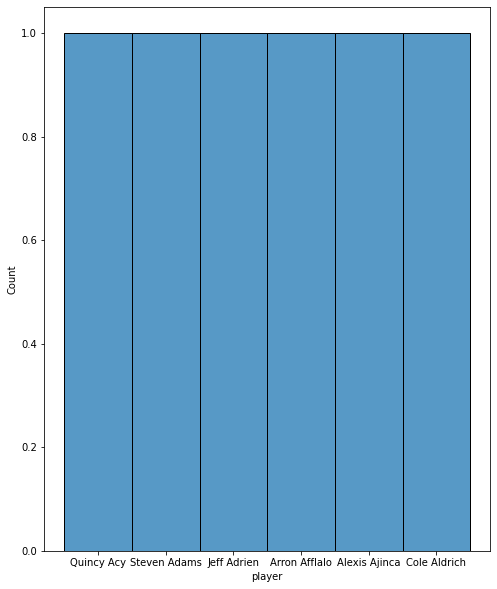

In [111]:
plt.figure(figsize=(8,10))
sea.histplot(nba.loc[:5,'player'])

Here we have show 5 players, similarly there are more 476 players 

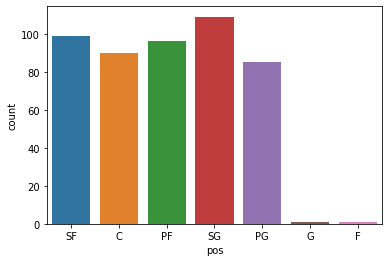

In [112]:
sea.countplot(nba['pos'])

- We have 6 different position for players(sf,c,pf,sg,pg,g,f).
- This the target variable we have to find a position of the player

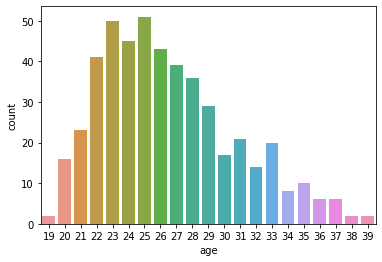

In [113]:
sea.countplot(nba['age'])

- Players with their respective ages
- minimum age of the player in the nba is 19 and the maximum age is 39
- large frequency of player who are playing in the nba are in the range of 22-29

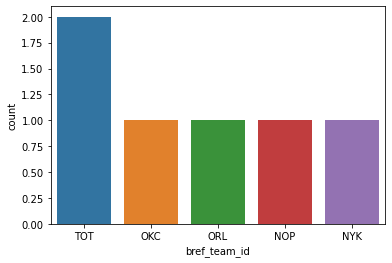

In [117]:
sea.countplot(nba.loc[:5, 'bref_team_id'])

In [122]:
nba['bref_team_id'].value_counts()

TOT    63
NOP    18
OKC    17
LAL    16
UTA    16
LAC    16
ATL    15
DAL    15
DET    15
PHO    15
HOU    15
MIA    15
NYK    15
BRK    15
POR    15
CLE    14
SAS    14
BOS    14
MIN    14
WAS    14
ORL    13
CHA    13
MIL    13
MEM    13
PHI    12
DEN    12
GSW    12
IND    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

- We have have total 31 teams,  here we have shown 5 teams. 
- Top 5 teams with maximum players are TOT, NOP, OKC, LAL, UTA    

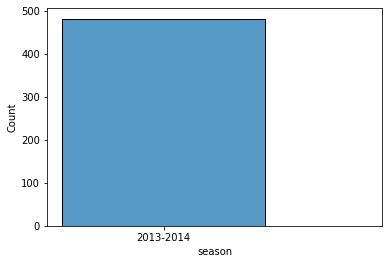

In [125]:
# Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
#        'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
#        'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
#        'pts', 'season', 'season_end'],
#       dtype='object')
sea.histplot(nba['season'])

The dataset is for the 2013-2014 season only

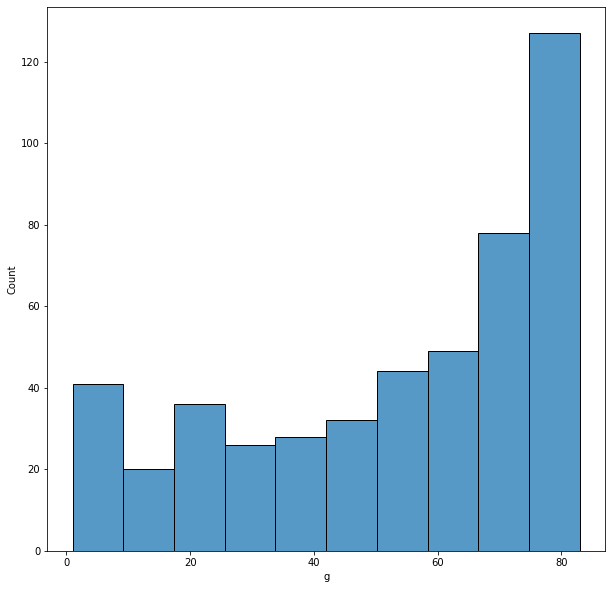

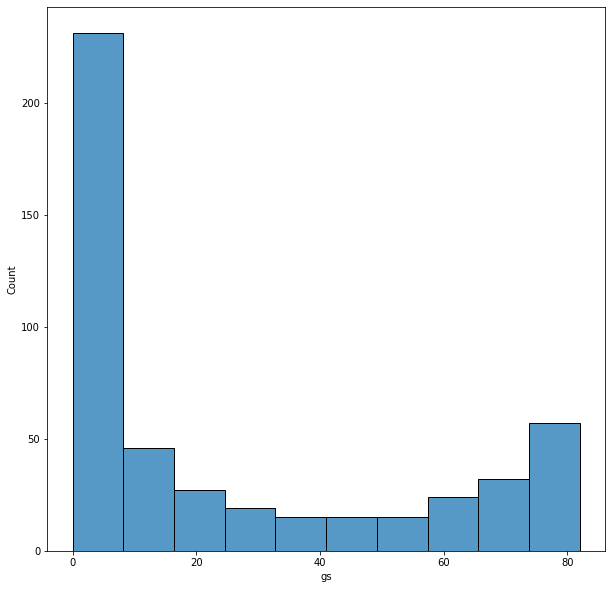

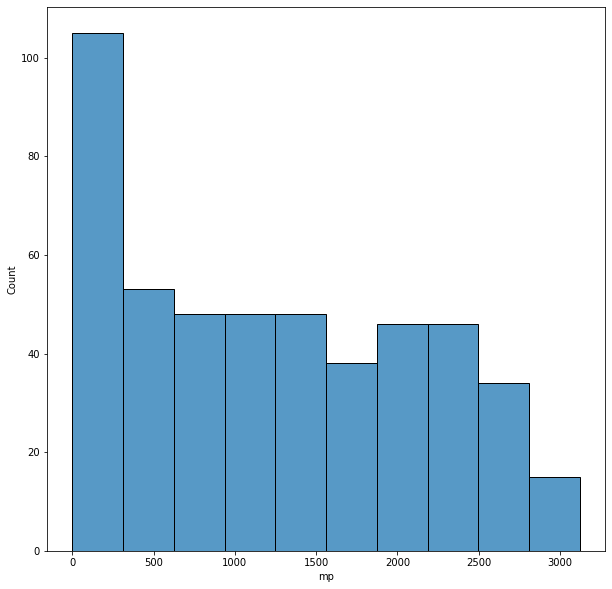

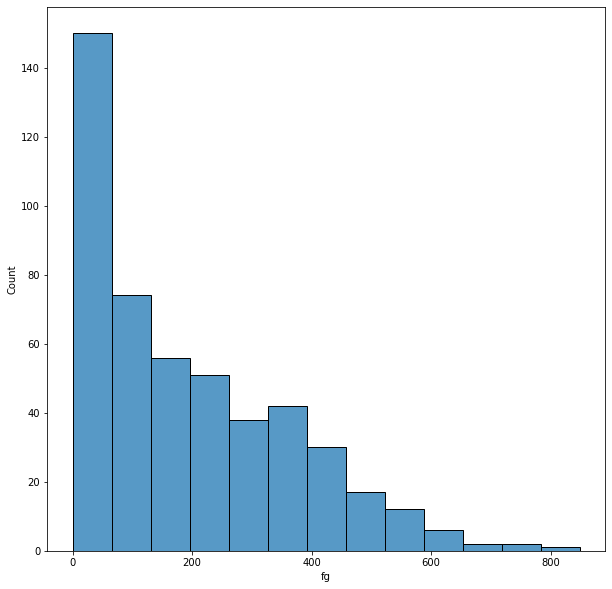

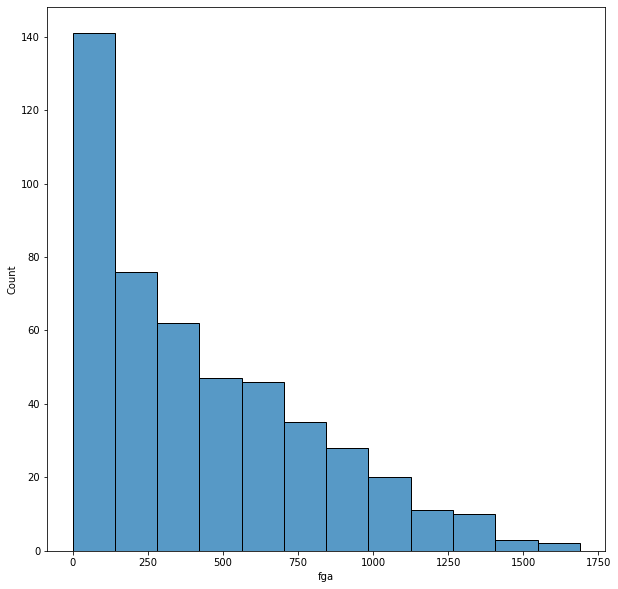

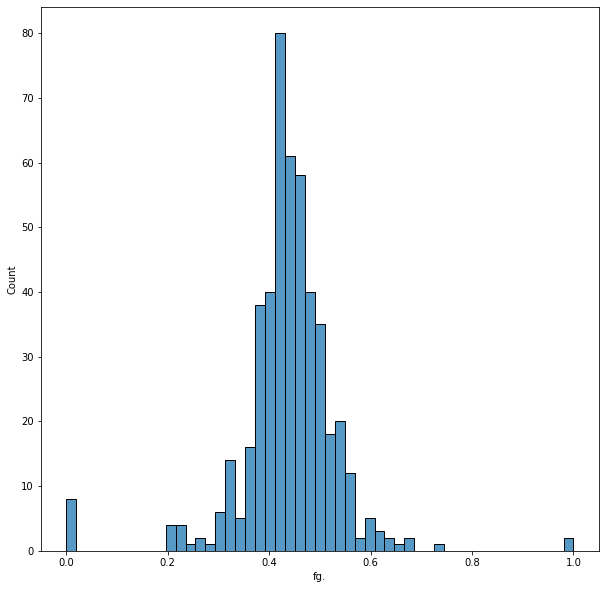

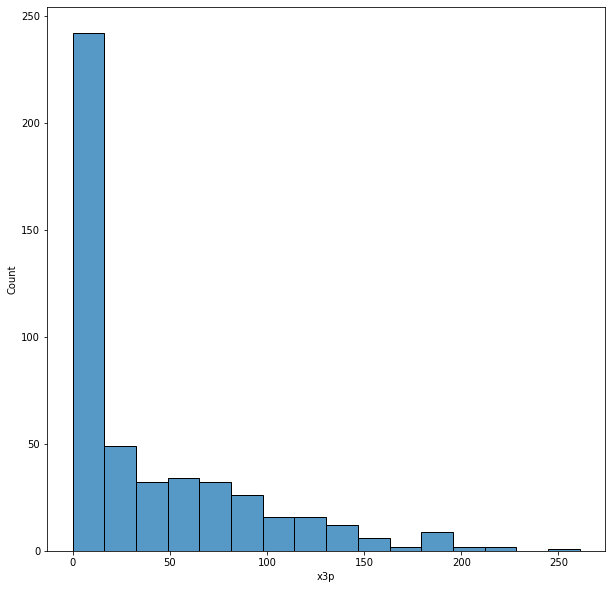

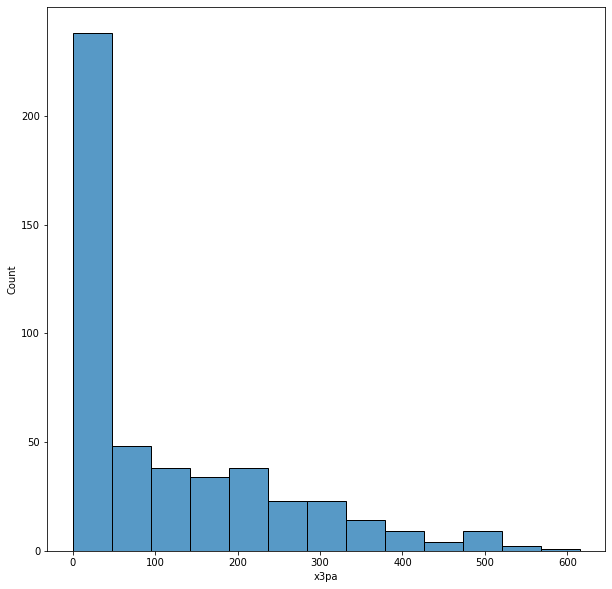

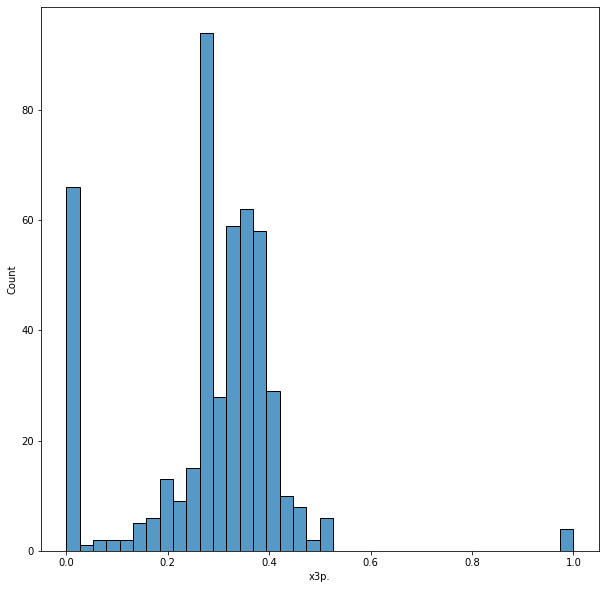

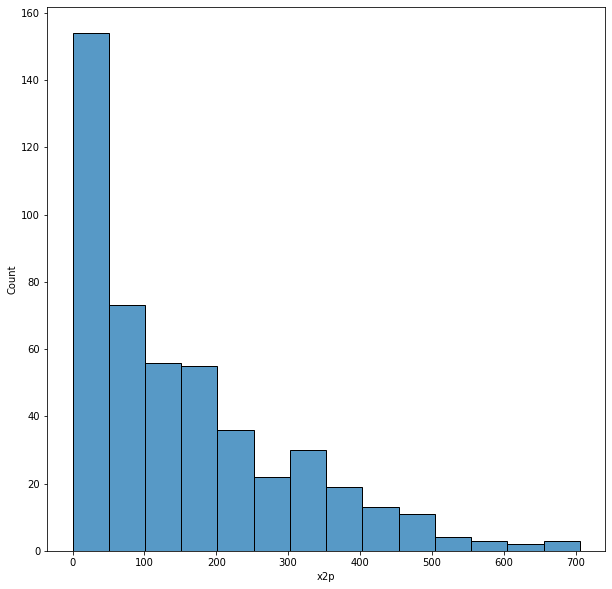

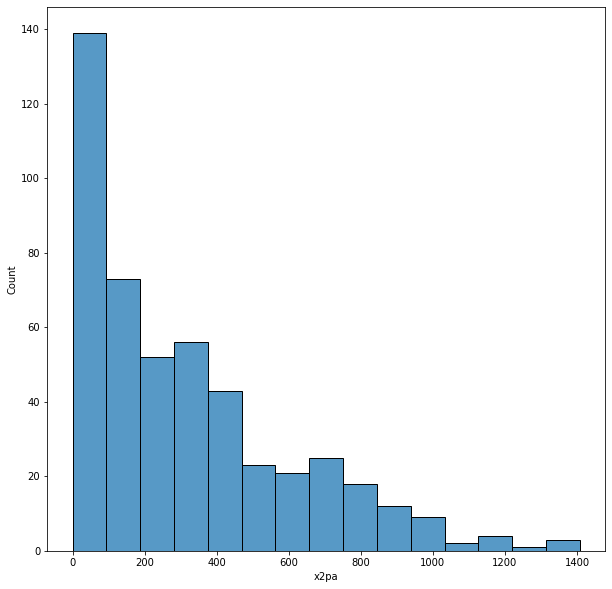

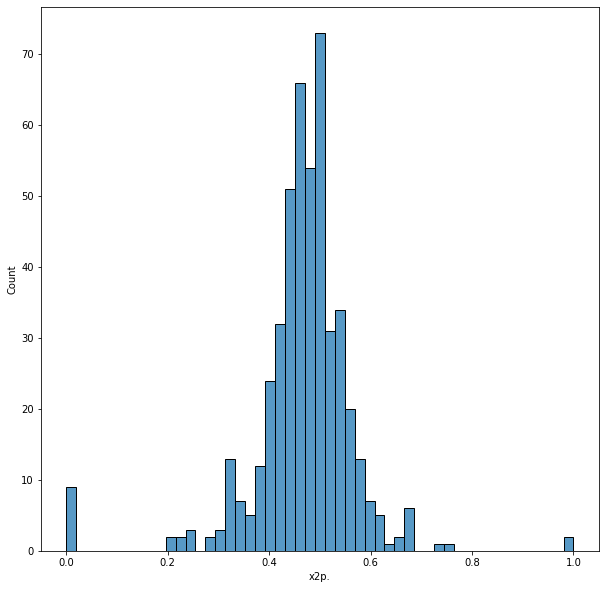

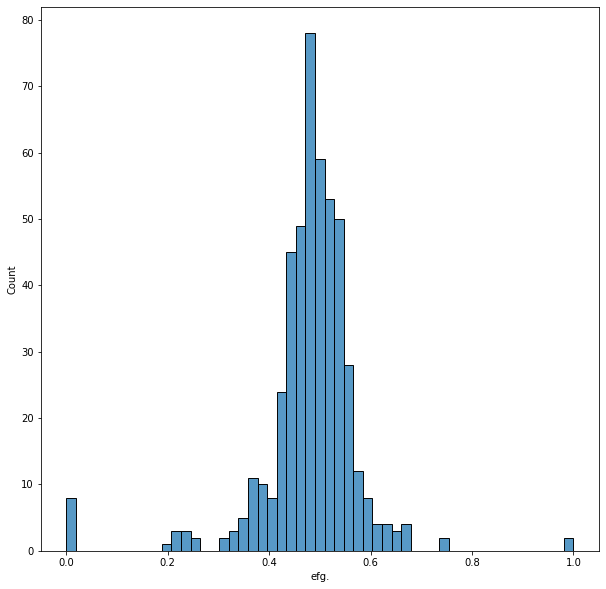

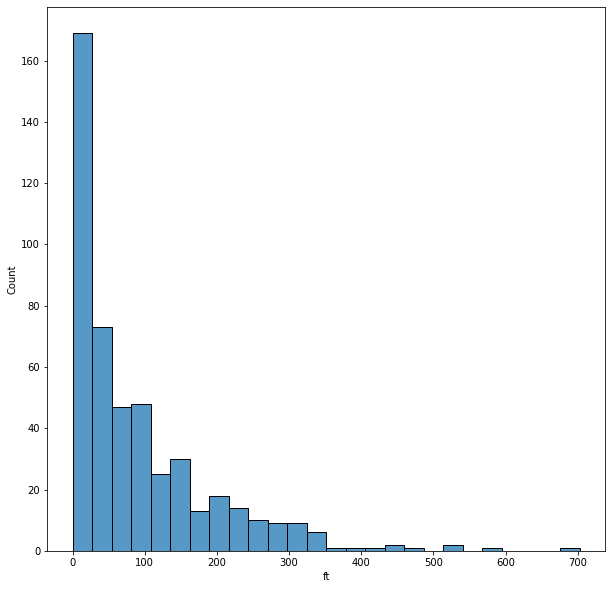

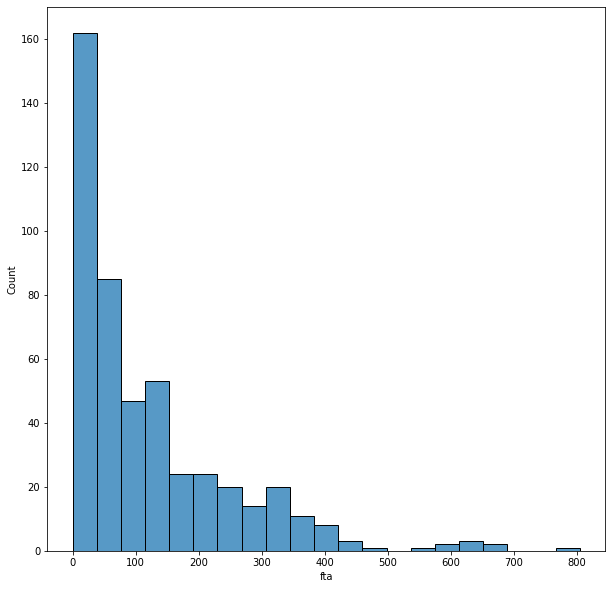

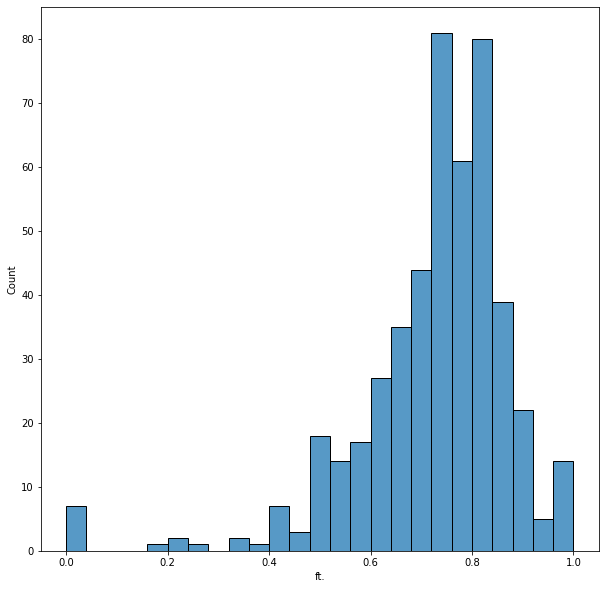

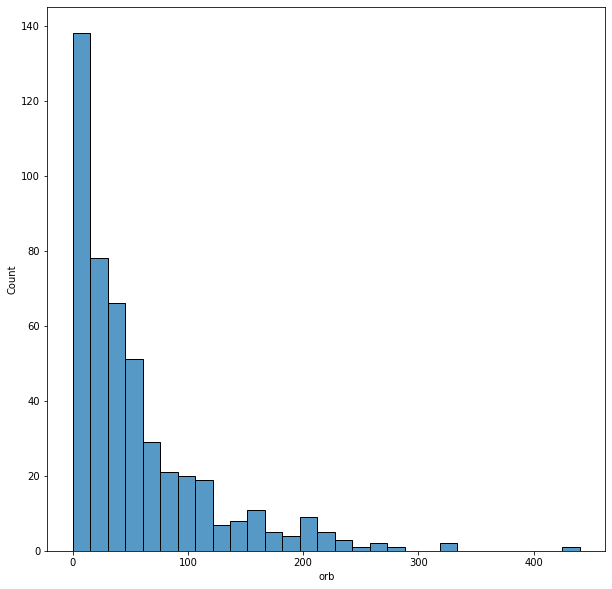

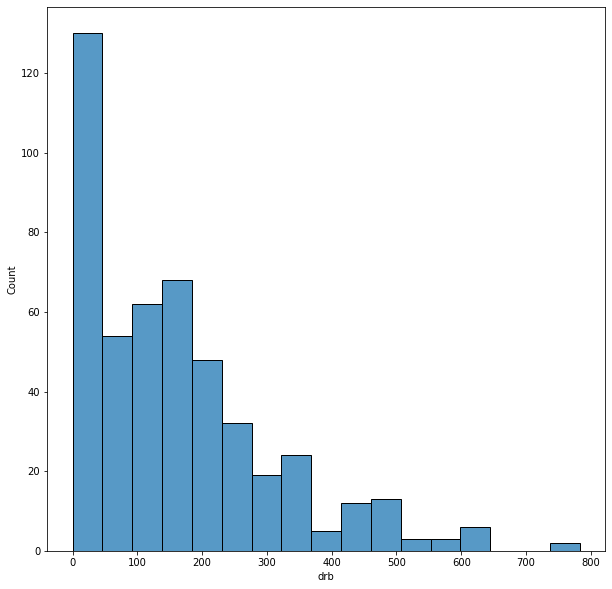

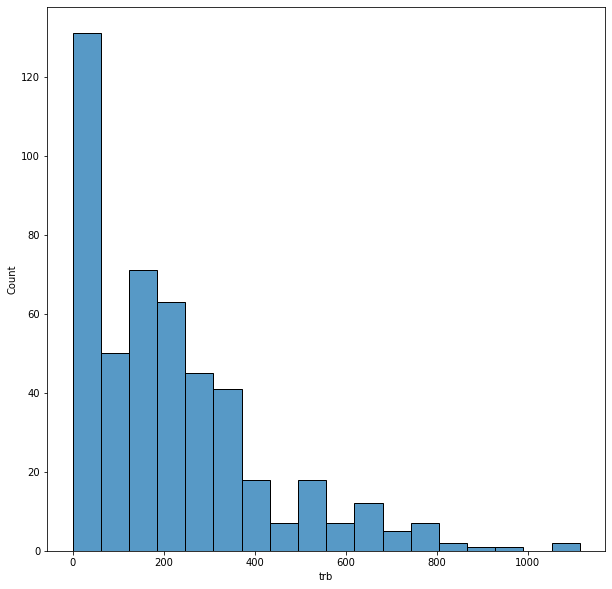

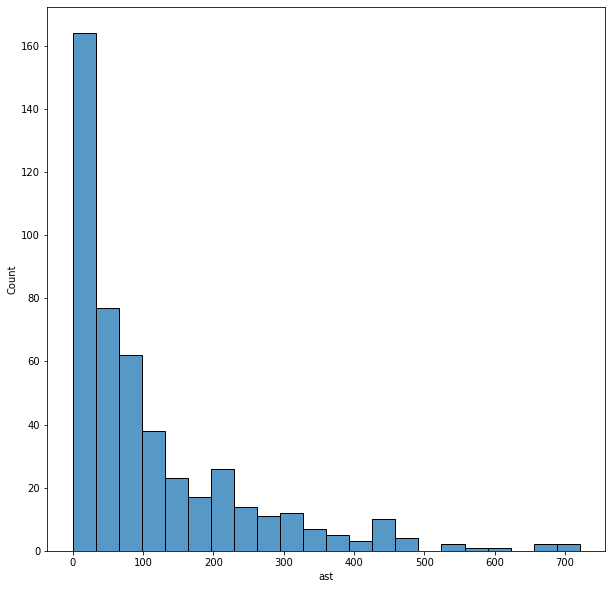

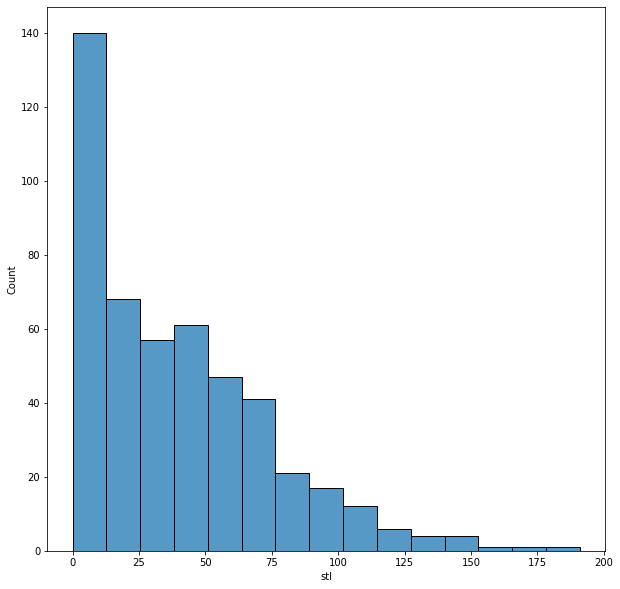

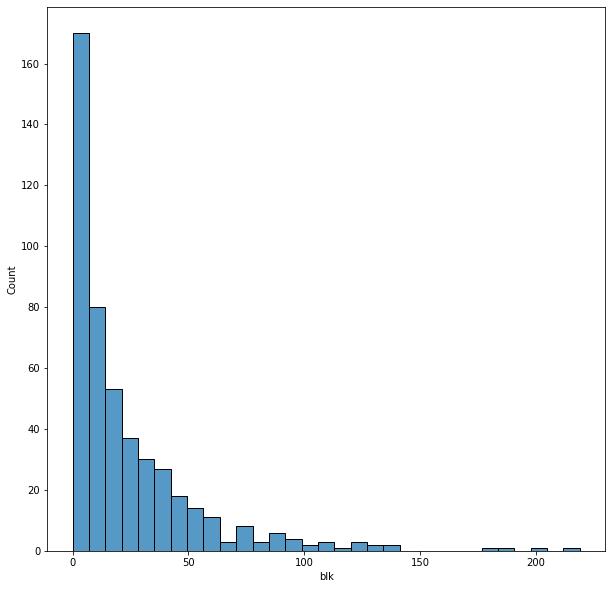

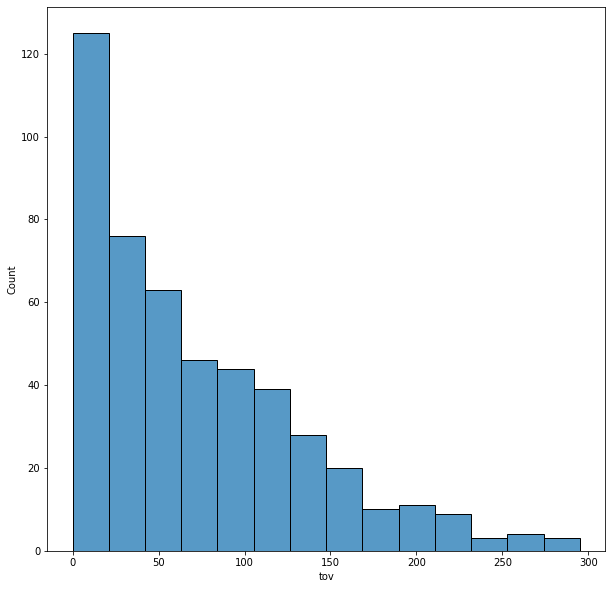

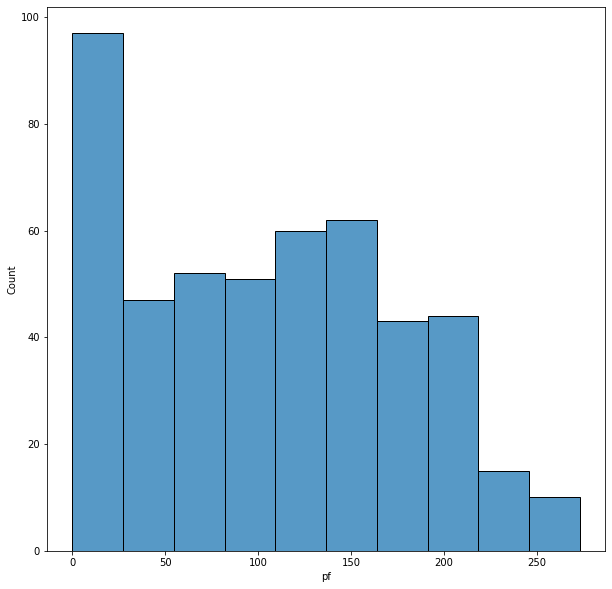

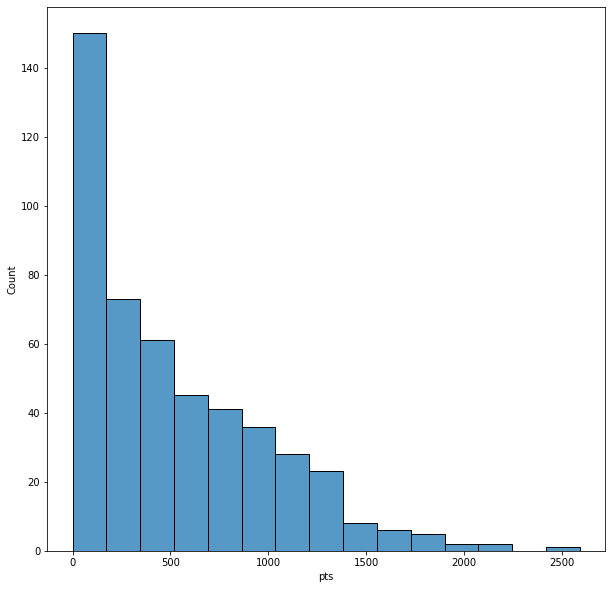

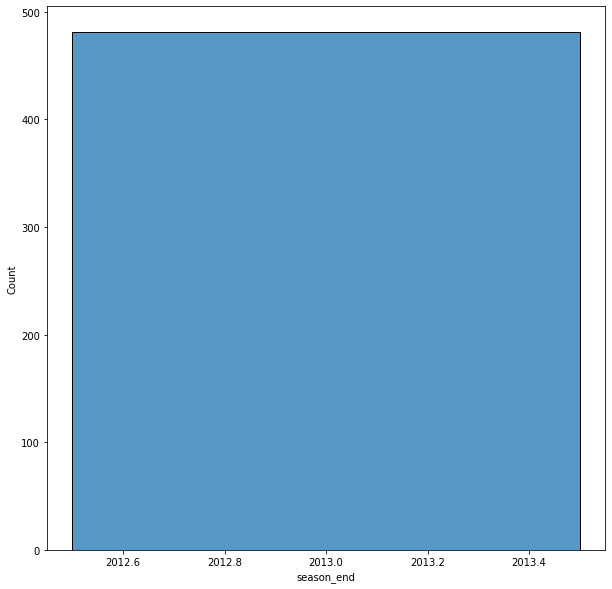

In [126]:
for i in ['g', 'gs', 'mp', 'fg', 'fga','fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
        'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
        'pts', 'season_end']:
  plt.figure(figsize=(10,10))
  sea.histplot(nba[i])

- 'g' represent the noofgames a player has played in season, graph shows maximum game the person has played is 80
- 'gs' no of game started by a player, shows most of the player has not started the game.
- 'mp' it is minute played, most people were benched, while only some player(could be experiance) lead the game.
- 'fg' feild goal, we sees there are more free thhrows than field goals
- 'fga' field goal attempt by combining fga there are more fga then ft
- 'fg.'field goal percentage
- 'x3p' 3-Point Field Goals, we got more 2s compare to the 3s this season
- 'x3pa' 3-Point Field Goal Attempts
- 'x3p.' Point Field Goal Percentage(3P%=3P/3PA)
- 'x2p' 2-Point Field Goals
- 'x2pa' 2-Point Field Goal Attempts
- 'x2p.' Point Field Goal Percentage(2P%=2P/2PA)
- 'efg.' Effective Field Goal Percentage; eFG% = (FG + 0.5 * 3P) / FGA
- 'ft' free throws 
- 'fta' free throws attempt
- 'ft.' Free Throw Percentage(FT%=FT/FTA)
- 'orb' Offensive Rebounds
- 'drb' Defensive Rebounds
- 'trb' Total Rebounds(TRB=ORB+DRB)
- ast assists
- stl steals
- blk blocks
- tov turnovers
- pf personal fouls
- pts points
- season_end

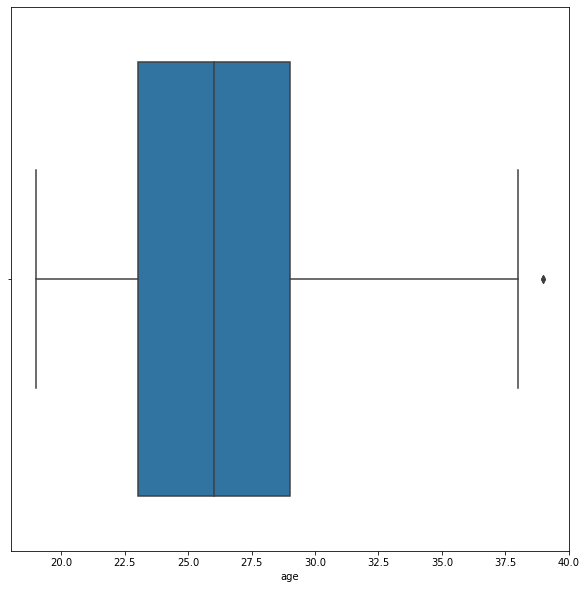

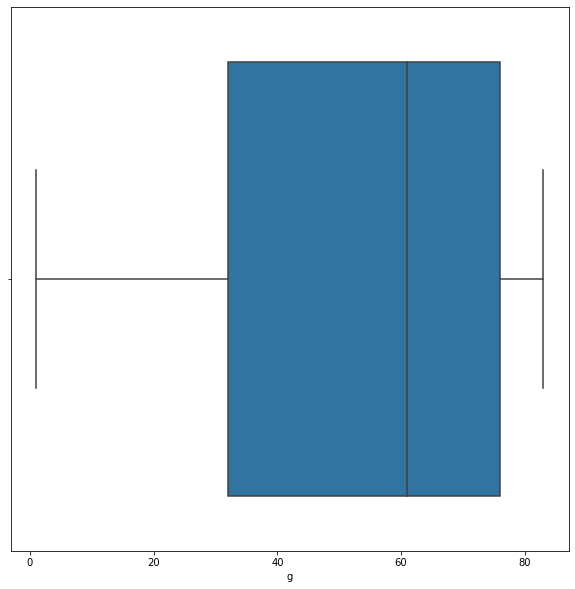

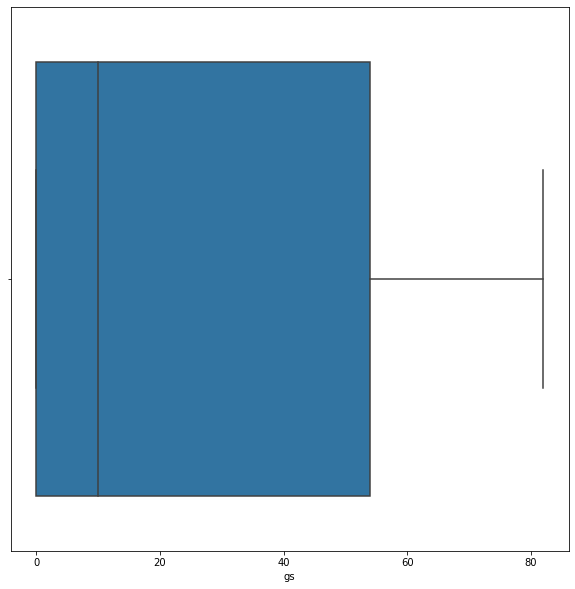

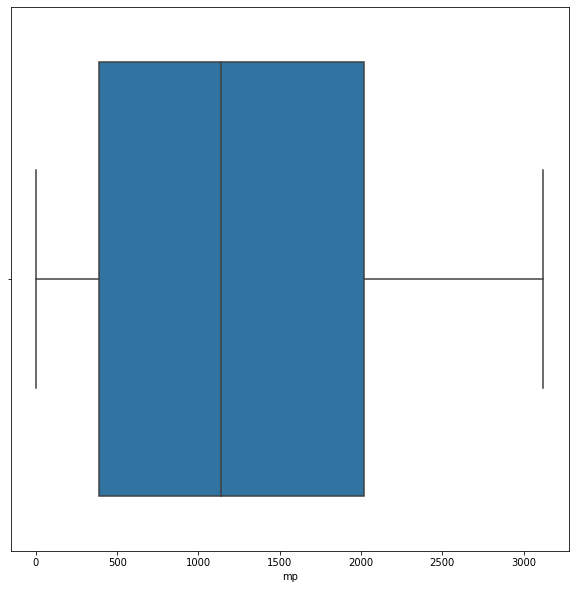

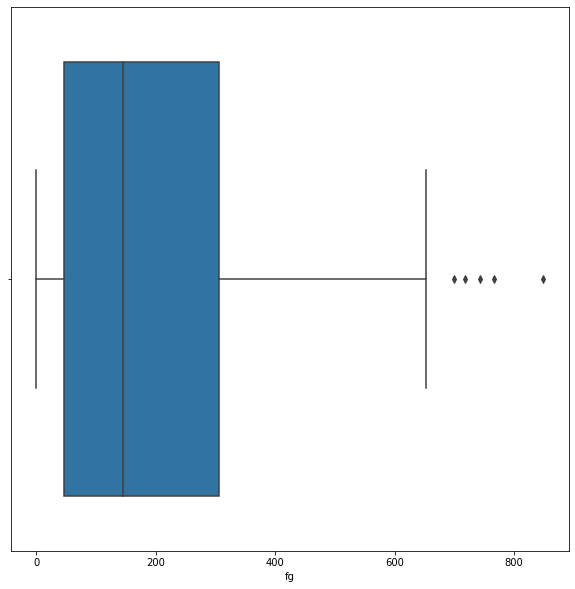

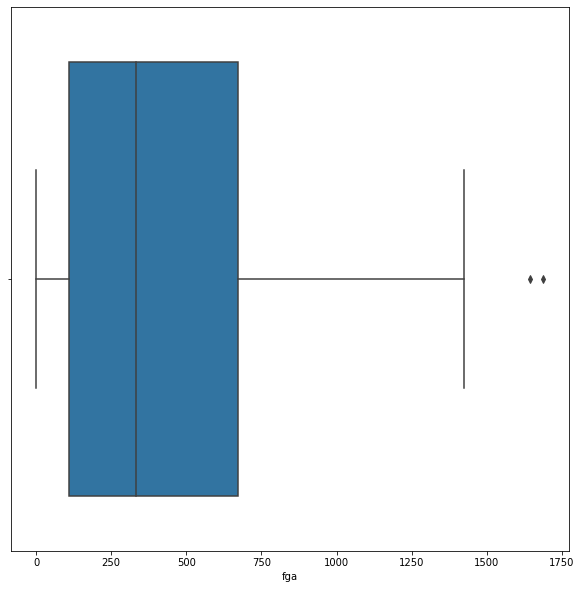

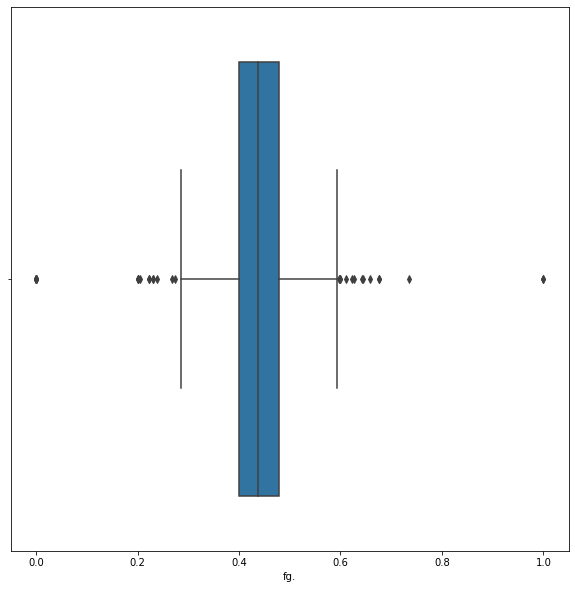

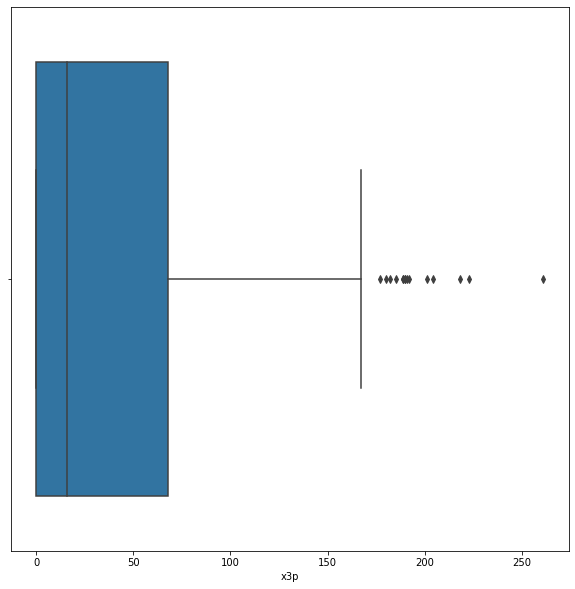

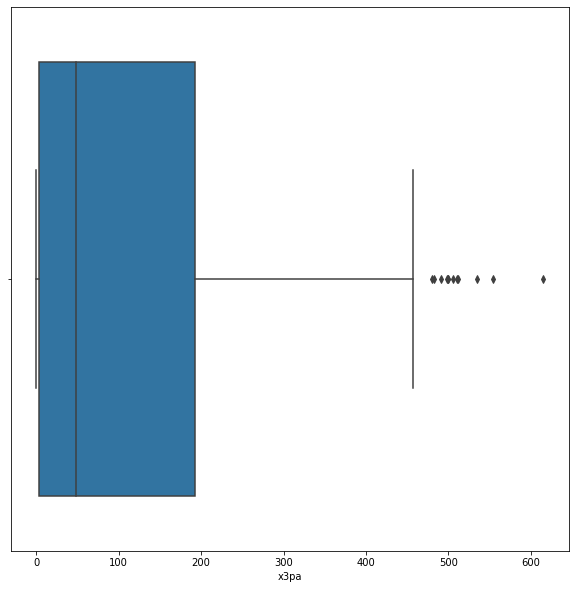

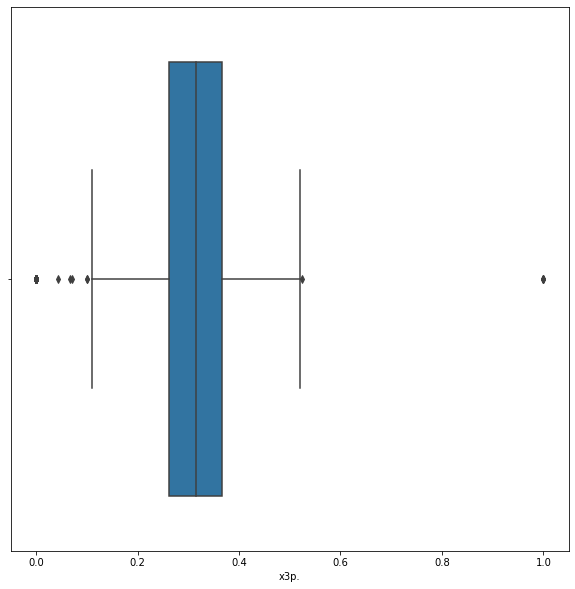

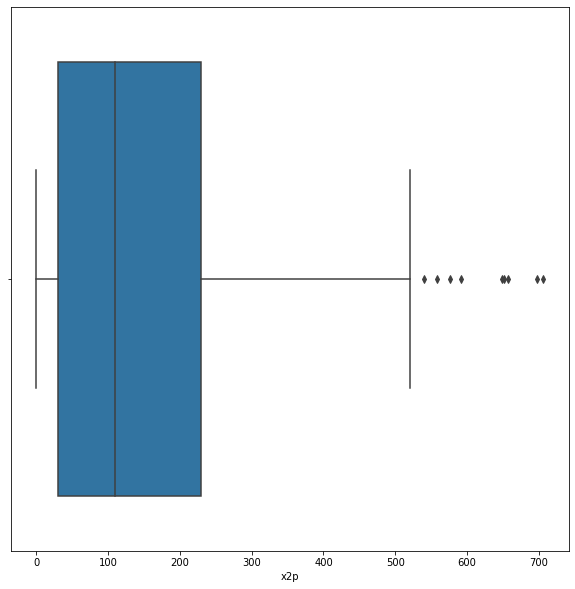

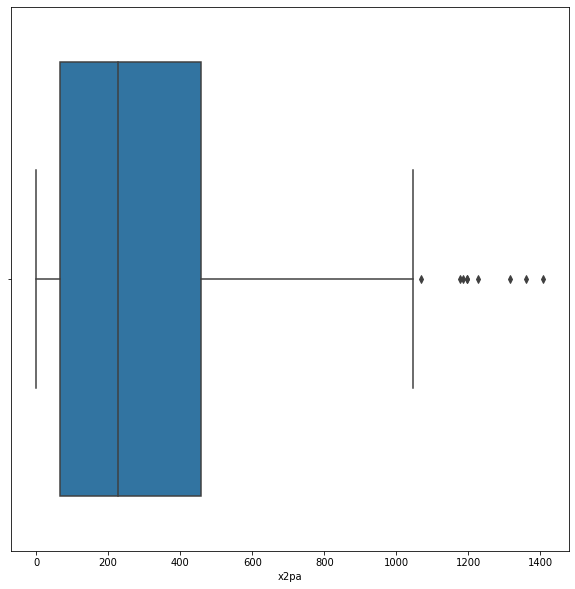

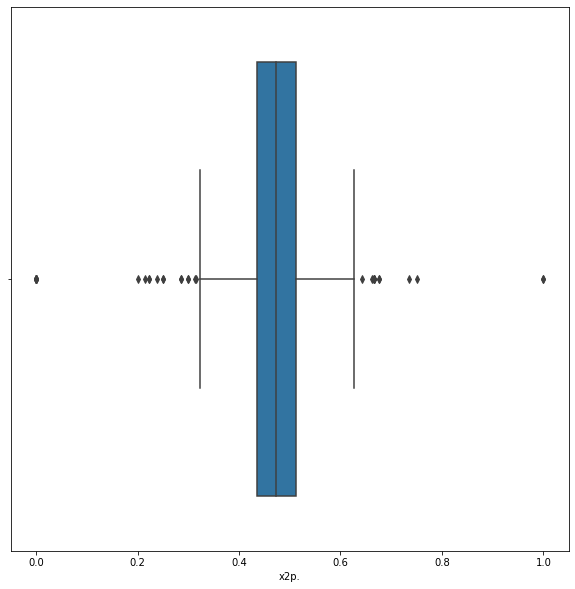

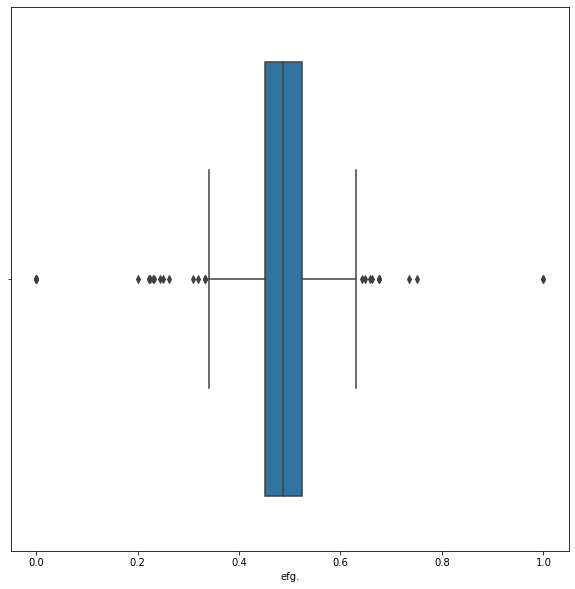

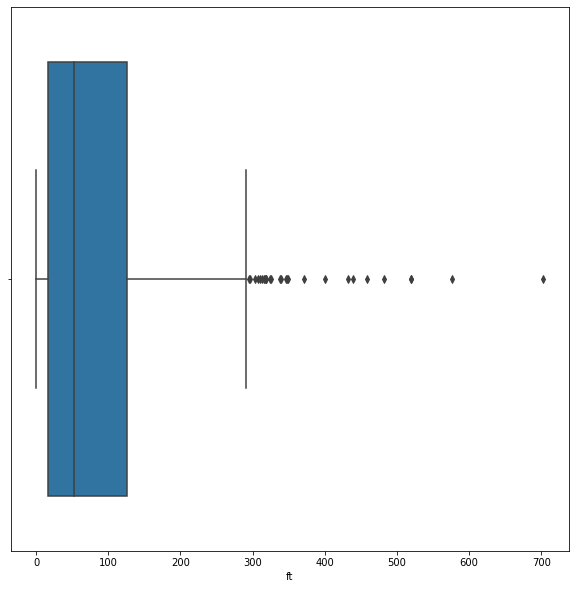

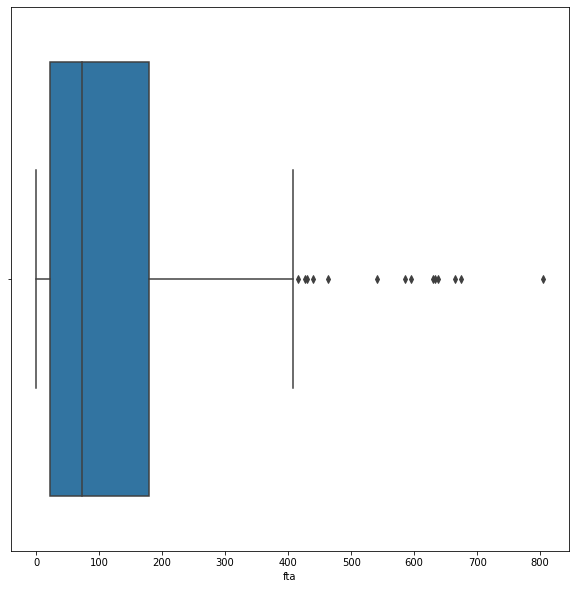

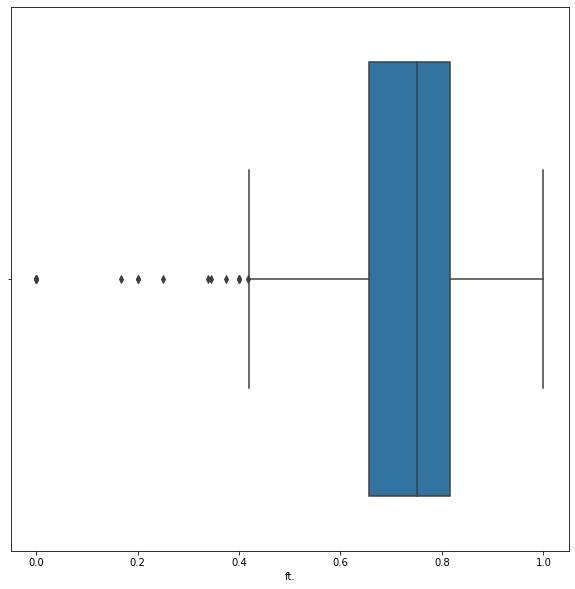

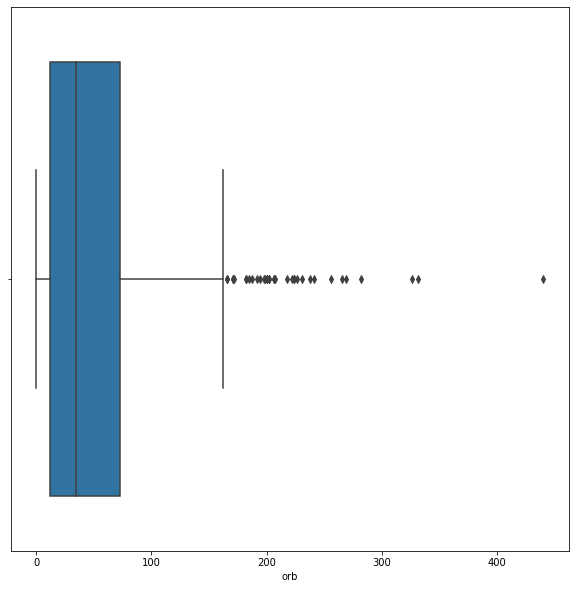

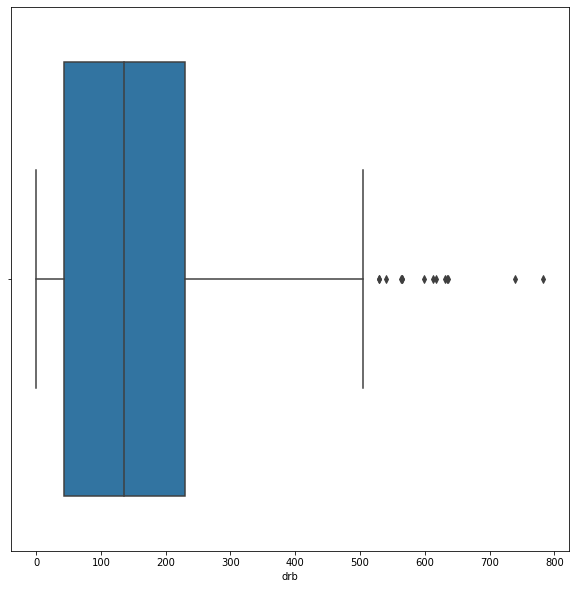

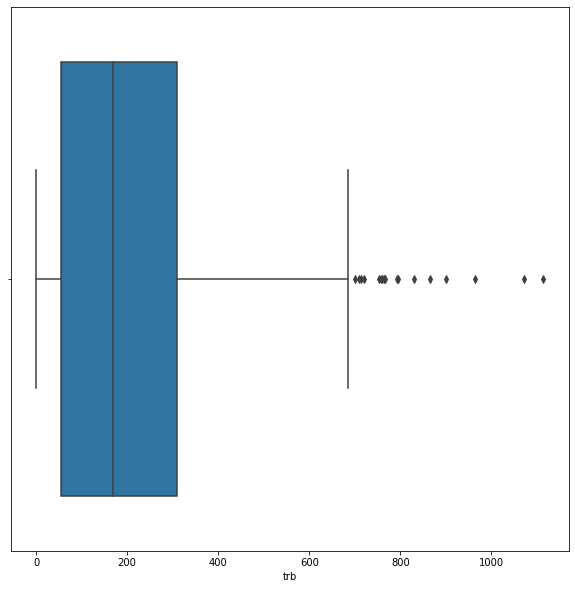

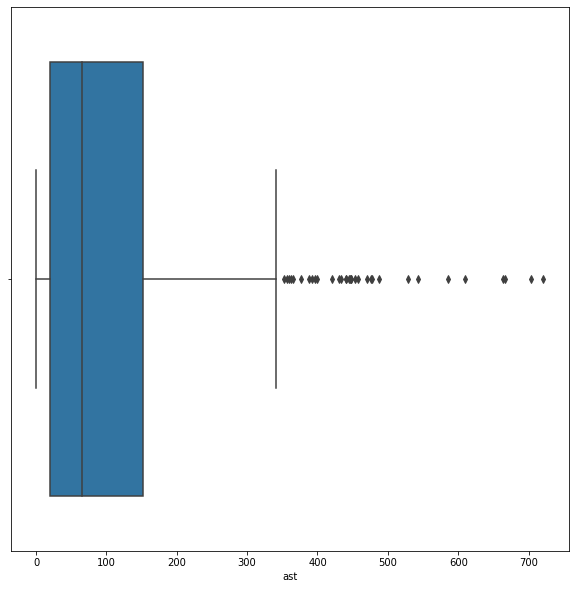

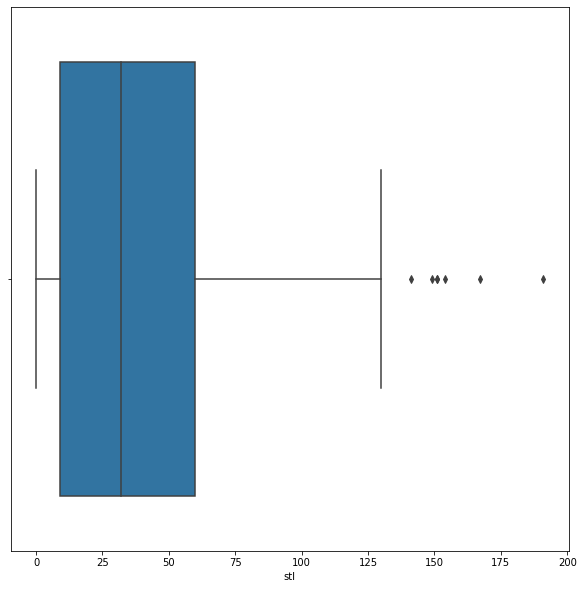

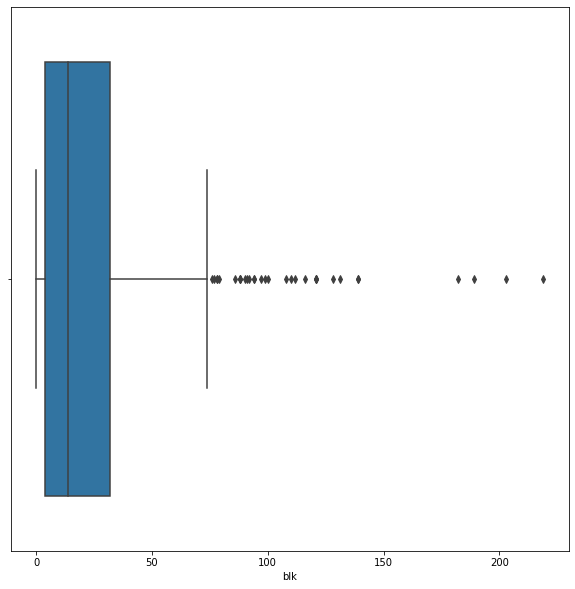

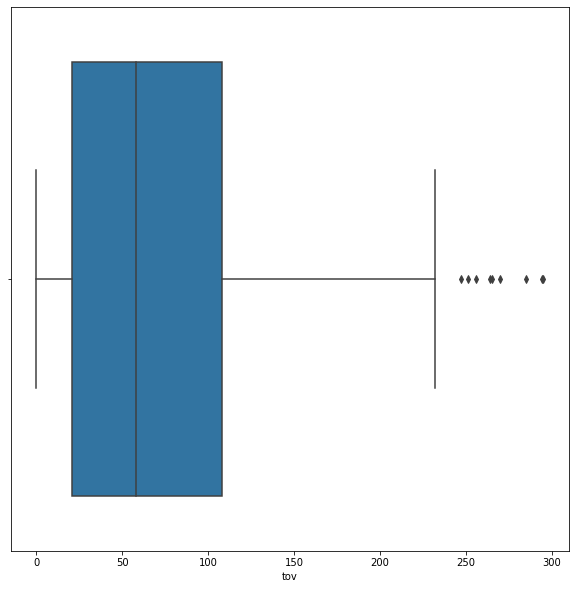

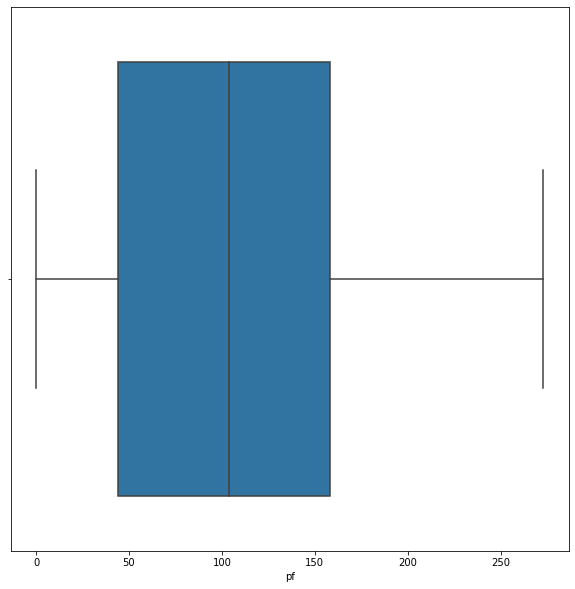

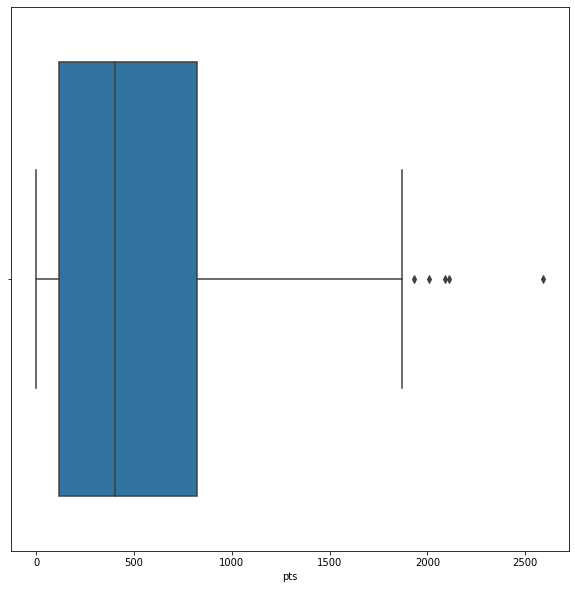

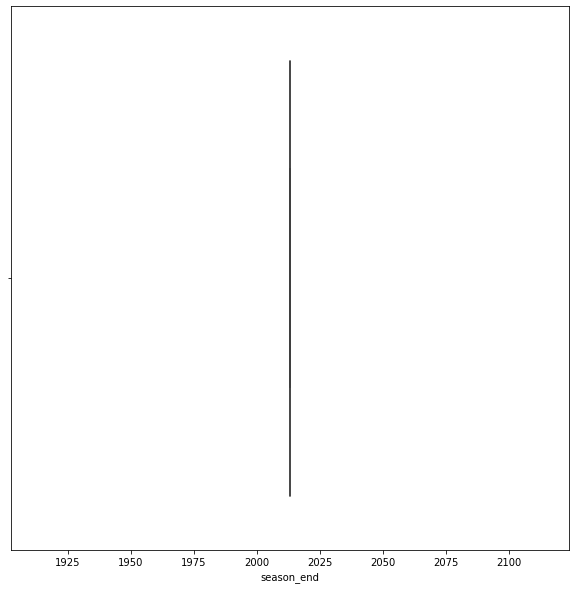

In [88]:
#numeric columns
for i in list(nba.select_dtypes(exclude=['object'])):
  plt.figure(figsize=(10,10))
  sea.boxplot(nba[i])

In [39]:
list(nba.columns)

['player',
 'pos',
 'age',
 'bref_team_id',
 'g',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg.',
 'x3p',
 'x3pa',
 'x3p.',
 'x2p',
 'x2pa',
 'x2p.',
 'efg.',
 'ft',
 'fta',
 'ft.',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'season',
 'season_end']

In [40]:
nba.select_dtypes(include=['object'])

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014
...,...,...,...,...
476,Tony Wroten,SG,PHI,2013-2014
477,Nick Young,SG,LAL,2013-2014
478,Thaddeus Young,PF,PHI,2013-2014
479,Cody Zeller,C,CHA,2013-2014


In [ ]:
nba.select_dtypes(include=['object'])

In [41]:
#Lets find out the categorical variable
for i in list(nba.columns):
  if nba[i].dtype=='object':
    print(nba[i].value_counts() )

Quincy Acy          1
James Jones         1
Andrew Nicholson    1
Jameer Nelson       1
Nemanja Nedovic     1
                   ..
Kevin Garnett       1
Francisco Garcia    1
Channing Frye       1
Joel Freeland       1
Tyler Zeller        1
Name: player, Length: 481, dtype: int64
SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64
TOT    63
NOP    18
OKC    17
LAL    16
UTA    16
LAC    16
ATL    15
DAL    15
DET    15
PHO    15
HOU    15
MIA    15
NYK    15
BRK    15
POR    15
CLE    14
SAS    14
BOS    14
MIN    14
WAS    14
ORL    13
CHA    13
MIL    13
MEM    13
PHI    12
DEN    12
GSW    12
IND    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64
2013-2014    481
Name: season, dtype: int64


In [42]:
#there are 3 columns of categorical type but we will not consider 'pos' as it is a target variable 
for i in ['player', 'bref_team_id', 'season']:
  le= LabelEncoder()
  nba[i]= le.fit_transform(nba[i])

In [43]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    int64  
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    int64  
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           481 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          481 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          481 non-null    float64
 16  efg.          481 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [24]:
x=nba.drop('pos', axis=1)
y=nba['pos']

In [122]:
x.head()

,player,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,370,23,28,63,0,847,66,141,0.468,4,...,144,216,28,23,26,30,122,171,0,2013
1,431,20,20,81,20,1197,93,185,0.503,0,...,190,332,43,40,57,71,203,265,0,2013
2,212,27,28,53,12,961,143,275,0.520,0,...,204,306,38,24,36,39,108,362,0,2013
3,39,28,21,73,73,2552,464,1011,0.459,128,...,230,262,248,35,3,146,136,1330,0,2013
4,12,25,18,56,30,951,136,249,0.546,0,...,183,277,40,23,46,63,187,328,0,2013


In [123]:
y.head()

0    SF
1     C
2    PF
3    SG
4     C
Name: pos, dtype: object

In [218]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y)

In [219]:
#svm
svm=SVC()
svm.fit(xtrain,ytrain)
svm.score(xtrain,ytrain), svm.score(xtest,ytest)

SVC()

In [220]:
svm.score(xtrain,ytrain), svm.score(xtest,ytest)

(0.45, 0.4793388429752066)

In [221]:
ypred= svm.predict(xtest)

To See How the multiclassification confuision matrics works see:
https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/

In [222]:
#confusion matrix
#we have 6 different classes in target variable(sg,sf,pf,c, pg, f)
svmcm= confusion_matrix(ytest, ypred)
svmcm

array([[21,  0,  2,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  1],
       [ 7,  0,  3,  1,  4,  3],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  1,  5,  8, 15],
       [ 0,  0,  0,  7,  3, 18]])

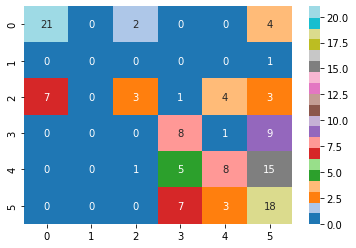

In [223]:
#to know how the heatmap works check
#see: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide

sea.heatmap(svmcm, cmap='tab20', annot=True)

In [224]:
#KNN
knn= KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [225]:
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.55, 0.3884297520661157)

In [226]:
ypred= knn.predict(xtest)

In [227]:
knncm= confusion_matrix(ytest, ypred)
knncm

array([[19,  0,  6,  0,  1,  1],
       [ 0,  0,  0,  1,  0,  0],
       [ 9,  0,  4,  1,  4,  0],
       [ 0,  0,  3,  8,  3,  4],
       [ 1,  0,  2,  9, 11,  6],
       [ 0,  0,  1, 16,  6,  5]])

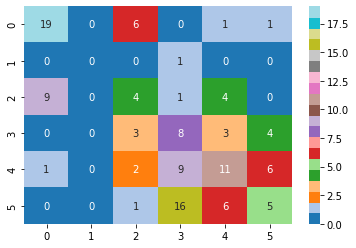

In [228]:
sea.heatmap(knncm, cmap='tab20', annot=True)

In [229]:
#Naive bayes
nb= GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [230]:
nb.score(xtrain,ytrain), nb.score(xtest,ytest)

(0.4083333333333333, 0.4049586776859504)

In [231]:
ypred= nb.predict(xtest)

In [232]:
nbcm= confusion_matrix(ytest, ypred)
nbcm

array([[22,  0,  1,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  1],
       [ 9,  0,  2,  1,  4,  2],
       [ 0,  0,  0,  9,  4,  5],
       [ 1,  0,  3, 12,  5,  8],
       [ 0,  0,  0, 13,  4, 11]])

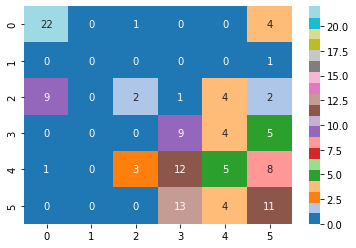

In [233]:
sea.heatmap(nbcm, cmap='tab20', annot=True)

In [234]:
#Decision Tree
dt= DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [235]:
dt.score(xtrain,ytrain), dt.score(xtest,ytest)

(0.9916666666666667, 0.4380165289256198)

In [236]:
ypred= dt.predict(xtest)

In [237]:
dtcm= confusion_matrix(ytest, ypred)
dtcm

array([[16,  0, 10,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 5,  0, 10,  0,  2,  1],
       [ 1,  0,  1,  7,  3,  6],
       [ 2,  0,  8,  4, 11,  4],
       [ 1,  0,  2,  8,  8,  9]])

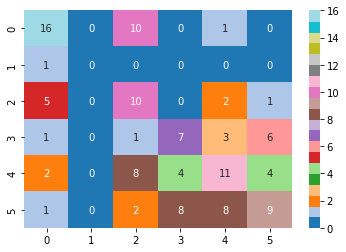

In [238]:
sea.heatmap(dtcm, cmap='tab20', annot=True)

In [239]:
#RandomForestClassifire
rdf= RandomForestClassifier()
rdf.fit(xtrain, ytrain)

RandomForestClassifier()

In [240]:
rdf.score(xtrain,ytrain), rdf.score(xtest,ytest)

(0.9916666666666667, 0.4628099173553719)

In [241]:
ypred= rdf.predict(xtest)

In [242]:
rdfcm= confusion_matrix(ytest, ypred)
rdfcm

array([[21,  0,  6,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 8,  0,  6,  0,  4,  0],
       [ 1,  0,  1,  7,  4,  5],
       [ 1,  0,  4,  8, 12,  4],
       [ 0,  0,  0, 10,  8, 10]])

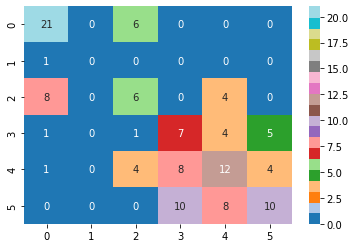

In [243]:
sea.heatmap(rdfcm, cmap='tab20', annot=True)

In [244]:
#AdaBoost
ab= AdaBoostClassifier()
ab.fit(xtrain, ytrain)

AdaBoostClassifier()

In [245]:
ab.score(xtrain,ytrain), ab.score(xtest,ytest)

(0.3416666666666667, 0.39669421487603307)

In [246]:
ypred= ab.predict(xtest)

In [247]:
adcm= confusion_matrix(ytest, ypred)
adcm

array([[19,  0,  0,  0,  8,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0, 14,  4],
       [ 1,  0,  0,  0, 25,  3],
       [ 0,  0,  0,  0, 24,  4]])

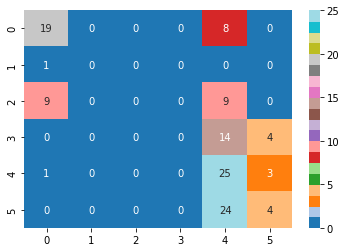

In [248]:
sea.heatmap(adcm, cmap='tab20', annot=True)

**Above we did cleansing, visualizing, encoding(label) and directly applied the models, these are the starting step which everyone should follow.**

<u>Note</u>: 
- Now furthur we will do normal distribution, oulier removal, etc.
- Model(rdf, svm, knn, dt) overfitted above.
    

<font size=50>**Feature Importance**</font>

Used ELI5 for feature importance.
<u>sources</u>: 
https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

https://www.kaggle.com/code/dansbecker/permutation-importance/tutorial

Here in feature importance there few methods which you can use such as LIME, SHAP, ELI5, AND YELLOWBRICK

In [4]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.2 MB/s 
     |████████████████████████████████| 133 kB 55.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=22b38193f03d3ed27951a7825aec1d24d7aff50a393f45e21816755c94858271
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [175]:
#using svm check important column
svm=SVC()
svm.fit(xtrain, ytrain)

SVC()

In [176]:
perm = PermutationImportance(svm)
perm.fit(xtrain,ytrain)

PermutationImportance(estimator=SVC())

In [177]:
show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
0.0900 ± 0.0215,mp
0.0739 ± 0.0376,trb
0.0356 ± 0.0065,ast
0.0239 ± 0.0103,pts
0.0233 ± 0.0152,x2pa
0.0206 ± 0.0159,fga
0.0156 ± 0.0097,drb
0.0072 ± 0.0167,x3pa
0.0028 ± 0.0035,orb
0.0006 ± 0.0082,pf


In [178]:
#using knn check important column
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [179]:
perm = PermutationImportance(knn)
perm.fit(xtrain,ytrain)

PermutationImportance(estimator=KNeighborsClassifier())

In [180]:
show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
0.2856 ± 0.0431,mp
0.1361 ± 0.0402,pts
0.0978 ± 0.0269,trb
0.0839 ± 0.0262,x2pa
0.0767 ± 0.0515,fga
0.0717 ± 0.0124,ast
0.0694 ± 0.0186,player
0.0483 ± 0.0163,drb
0.0228 ± 0.0397,fg
0.0111 ± 0.0145,orb


In [181]:
#using nb check important column
nb=GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [182]:
perm = PermutationImportance(nb)
perm.fit(xtrain,ytrain)

PermutationImportance(estimator=GaussianNB())

In [183]:
show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
0.0406 ± 0.0194,x3pa
0.0400 ± 0.0143,orb
0.0389 ± 0.0342,blk
0.0372 ± 0.0218,x3p
0.0178 ± 0.0097,stl
0.0167 ± 0.0169,x3p.
0.0156 ± 0.0171,x2p.
0.0128 ± 0.0130,fg.
0.0117 ± 0.0074,ft.
0.0106 ± 0.0215,ast


In [185]:
#using dt check important column
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [186]:
perm = PermutationImportance(dt)
perm.fit(xtrain,ytrain)

PermutationImportance(estimator=DecisionTreeClassifier())

In [187]:
show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
0.4078 ± 0.0247,orb
0.2872 ± 0.0325,x3p
0.2306 ± 0.0402,ast
0.1678 ± 0.0344,pf
0.1556 ± 0.0105,blk
0.1267 ± 0.0255,trb
0.1111 ± 0.0192,stl
0.0961 ± 0.0338,ft.
0.0711 ± 0.0083,x3pa
0.0611 ± 0.0145,efg.


In [189]:
#using rdf check feature importance
rdf=RandomForestClassifier()
rdf.fit(xtrain, ytrain)

RandomForestClassifier()

In [190]:
perm = PermutationImportance(rdf)
perm.fit(xtrain,ytrain)

PermutationImportance(estimator=RandomForestClassifier())

In [191]:
show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
0.0311 ± 0.0113,ast
0.0039 ± 0.0057,orb
0.0028 ± 0.0035,stl
0.0017 ± 0.0027,blk
0.0011 ± 0.0027,x3pa
0 ± 0.0000,g
0 ± 0.0000,gs
0 ± 0.0000,mp
0 ± 0.0000,fg
0 ± 0.0000,fga


In [192]:
ab= AdaBoostClassifier()
ab.fit(xtrain, ytrain)


AdaBoostClassifier()

In [193]:
perm = PermutationImportance(ab)
perm.fit(xtrain,ytrain)

PermutationImportance(estimator=AdaBoostClassifier())

In [194]:
show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
0.1422 ± 0.0221,x3p
0.0139 ± 0.0093,orb
0.0044 ± 0.0027,g
0 ± 0.0000,gs
0 ± 0.0000,mp
0 ± 0.0000,fg
0 ± 0.0000,fga
0 ± 0.0000,fg.
0 ± 0.0000,x3pa
0 ± 0.0000,x2p.


In [215]:
x= nba[['x3p', 'orb', 'g', 'x3pa', 'blk']]
y= nba['pos']

In [216]:
x.head()

,x3p,orb,g,x3pa,blk
0,4,72,63,15,26
1,0,142,81,0,57
2,0,102,53,0,36
3,128,32,73,300,3
4,0,94,56,1,46


In [217]:
y.head()

0    SF
1     C
2    PF
3    SG
4     C
Name: pos, dtype: object

**Using Feature Importance we did not get too much change in accuracy(only svm shows better accuracy and not overfit), but we can go with the selected features as model complexity will reduce.**

<font size=50>Now We'll go with the normal distribution</font>

for this we will use feature important columns.

In [44]:
feature_importance_columns= ['x3p', 'orb', 'g', 'x3pa', 'blk']

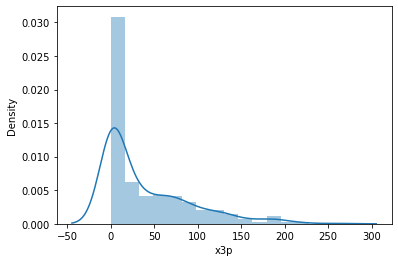

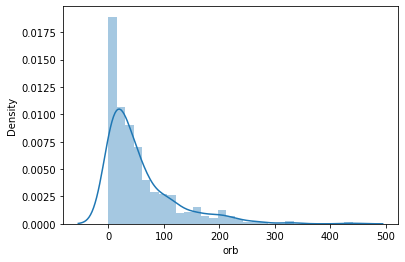

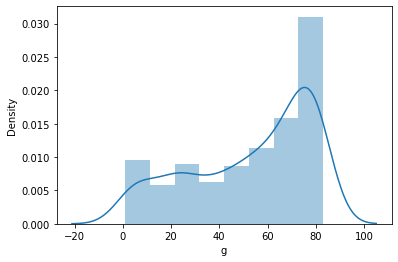

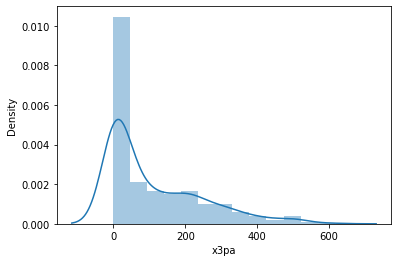

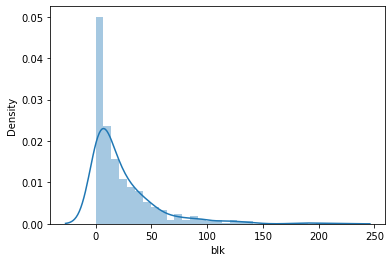

In [45]:
for i in feature_importance_columns:
  plt.figure()
  sea.distplot(nba[i]) 

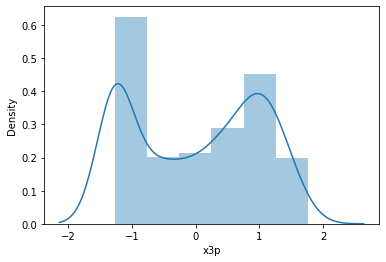

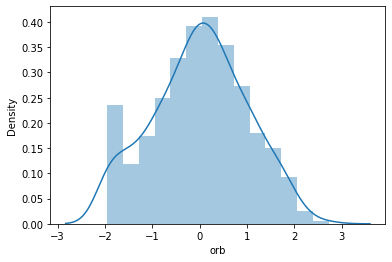

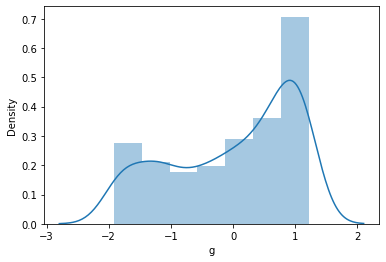

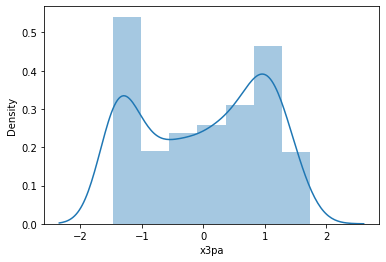

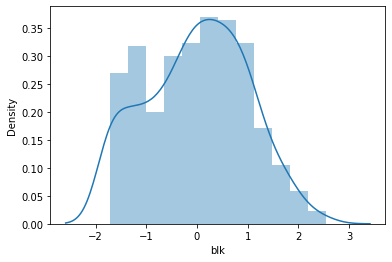

In [47]:
#Yeo Transformation
feature_importance_columns= ['x3p', 'orb', 'g', 'x3pa', 'blk']
for x in feature_importance_columns:
    pt = PowerTransformer(method='yeo-johnson')
    nba[x] = pt.fit_transform(nba[x].to_frame())
    plt.figure()
    sea.distplot(nba[x])

In [48]:
#lets see how our data is looking after transformation(yeo) into normal distribution
nba[['x3p', 'orb', 'g', 'x3pa', 'blk']].head()

,x3p,orb,g,x3pa,blk
0,-0.490218,0.646288,0.358345,-0.425893,0.556739
1,-1.271057,1.327902,1.139288,-1.468244,1.222391
2,-1.271057,0.982571,-0.060092,-1.468244,0.823788
3,1.321560,-0.037923,0.788146,1.217877,-0.865532
4,-1.271057,0.901270,0.064153,-1.244145,1.033284


In [51]:
nba[['pos']]

,pos
0,SF
1,C
2,PF
3,SG
4,C
...,...
476,SG
477,SG
478,PF
479,C


In [52]:
x=nba[['x3p', 'orb', 'g', 'x3pa', 'blk']]
y= nba['pos']
xtrain,xtest,ytrain,ytest= train_test_split(x,y)

In [53]:
#svm
svm=SVC()
svm.fit(xtrain,ytrain)

SVC()

In [54]:
svm.score(xtrain,ytrain), svm.score(xtest,ytest)

(0.525, 0.4462809917355372)

In [55]:
#knn
knn= KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [56]:
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.6, 0.3305785123966942)

In [57]:
#nb
nb= GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [58]:
nb.score(xtrain,ytrain), nb.score(xtest,ytest)

(0.44166666666666665, 0.4793388429752066)

In [59]:
#Decision tree
dt= DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [60]:
dt.score(xtrain,ytrain), dt.score(xtest,ytest)

(1.0, 0.3140495867768595)

In [61]:
#random forest
rdf= RandomForestClassifier()
rdf.fit(xtrain, ytrain)

RandomForestClassifier()

In [62]:
rdf.score(xtrain,ytrain), rdf.score(xtest,ytest)

(1.0, 0.3884297520661157)

In [63]:
#adaboost
ab= AdaBoostClassifier()
ab.fit(xtrain, ytrain)

AdaBoostClassifier()

In [64]:
ab.score(xtrain,ytrain), ab.score(xtest,ytest)

(0.35555555555555557, 0.35537190082644626)

**Conclusion**: 
- The size of the dataset is less((481, 31)), thus the accuracy will be less only.
- From the above dataset we got to know the feature which are more important, which are contributing more but not decreasing our accuracy are ['x3p', 'orb', 'g', 'x3pa', 'blk']
- svm and naive bayes are giving good accuracy on both the training and testing data.
- decision tree, random forest, knn overfits on the data.
 